In [1]:
import numpy as np
import os

In [2]:
os.system("pwd")

/home/yss


0

In [4]:
data = np.load("./token_embeddings.npz")

In [9]:
data['tokens'].shape, data['embeddings'].shape

((110,), (110, 512))

In [10]:
tokens = data['tokens']
embeddings = data['embeddings']

In [19]:
def PCA(array : np.ndarray):
    mean = array.mean(axis = 0)
    std = array.std(axis=0)
    z = (array-mean) / std


    cov = z.T@ z / z.shape[0]

    eigenvals, eigenvects = np.linalg.eigh(cov)

    sorted_indices = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[sorted_indices]
    eigenvects = eigenvects[:, sorted_indices]

    projected_data = z @ eigenvects[:, :2]

    return projected_data

most_sign = PCA(embeddings)

In [ ]:
most_sign

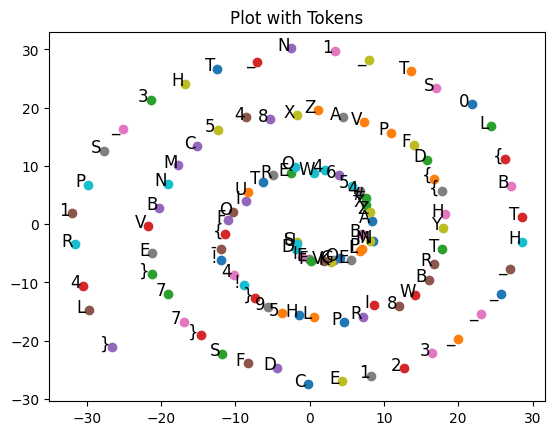

In [26]:
import matplotlib.pyplot as plt

for i, j in zip(tokens, most_sign):
    plt.scatter( j[0],j[1], label=i)  
    
    plt.text(j[0]-1, j[1]-1, i, fontsize=12, ha='center', va='bottom') 

plt.title('Plot with Tokens')
plt.show()